In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

# Part 1

In [2]:
temps = data.sf_temps()

In [4]:
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [8]:
temps = temps.set_index(temps.date).sort_index().drop(columns='date')

In [9]:
temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [10]:
temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


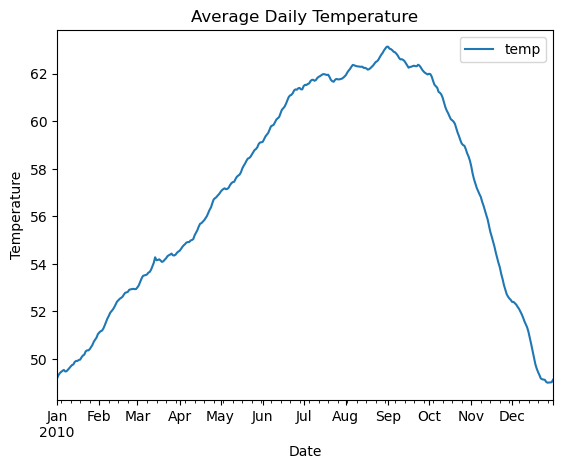

In [14]:
temps.resample('D').mean().plot()
plt.title('Average Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

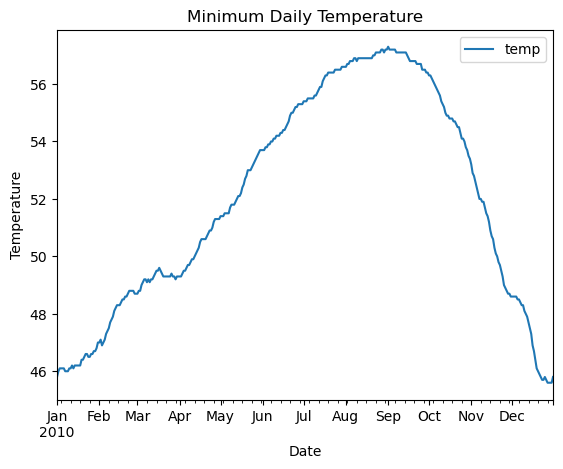

In [15]:
temps.resample('D').min().plot()
plt.title('Minimum Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

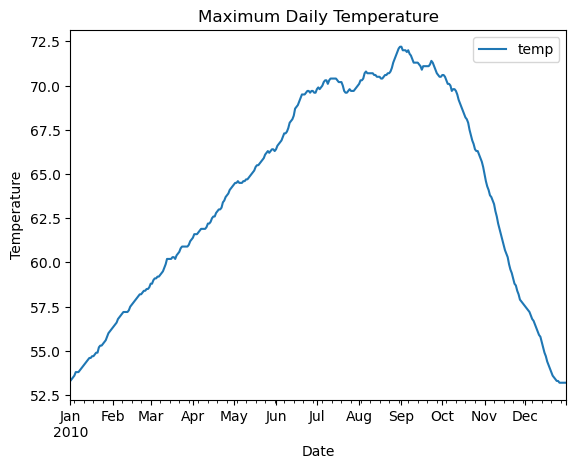

In [16]:
temps.resample('D').max().plot()
plt.title('Maximum Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### 4. Which month is the coldest, on average?

In [22]:
temps.resample('M').mean().sort_values('temp').head(1)

,temp
date,
2010-01-31,49.98414


#### January

### 5. Which month has the highest average temperature?

In [23]:
temps.resample('M').mean().sort_values('temp').tail(1)

,temp
date,
2010-09-30,62.487083


#### September

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [38]:
daily_temps = temps.resample('D').agg(['min', 'max', 'mean'])

In [39]:
daily_temps.head()

temp                 
             min   max       mean
date                             
2010-01-01  45.8  53.3  49.170833
2010-01-02  46.0  53.4  49.304167
2010-01-03  46.1  53.5  49.391667
2010-01-04  46.1  53.6  49.445833
2010-01-05  46.1  53.8  49.491667

In [29]:
daily_temps.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [41]:
daily_temps['diff'] = daily_temps[('temp', 'min')] - daily_temps[('temp', 'max')]

In [42]:
daily_temps.head()

temp                  diff
             min   max       mean     
date                                  
2010-01-01  45.8  53.3  49.170833 -7.5
2010-01-02  46.0  53.4  49.304167 -7.4
2010-01-03  46.1  53.5  49.391667 -7.4
2010-01-04  46.1  53.6  49.445833 -7.5
2010-01-05  46.1  53.8  49.491667 -7.7

In [43]:
daily_temps.resample('M').mean().sort_values('diff').head(1)

temp                             diff
                  min        max       mean           
date                                                  
2010-09-30  56.903333  71.306667  62.487083 -14.403333

#### Which month has the highest daily temperature variability? September

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

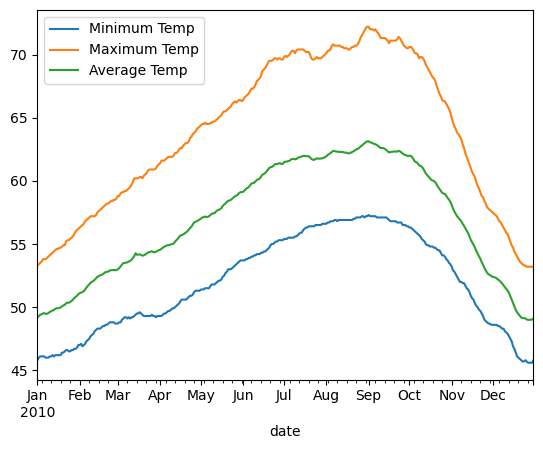

In [47]:
daily_temps[('temp', 'min')].plot(label='Minimum Temp')
daily_temps[('temp', 'max')].plot(label='Maximum Temp')
daily_temps[('temp', 'mean')].plot(label='Average Temp')
plt.legend()
plt.show()

# Part 2

In [48]:
seattle = data.seattle_weather()

In [49]:
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [52]:
seattle = seattle.set_index('date').sort_index()

In [53]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [74]:
seattle.groupby(
    [seattle.index.year, seattle.index.month]
    ).precipitation.sum().sort_values(ascending=False).head(1)

date  date
2015  12      284.5
Name: precipitation, dtype: float64

#### December 2015

### 2. Visualize the amount of monthly precipitation over time.

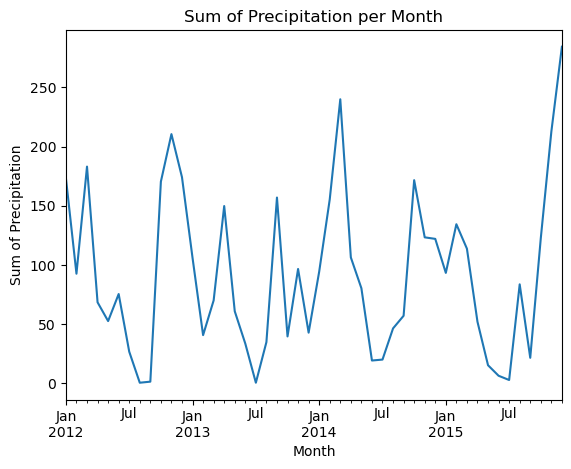

In [80]:
seattle.resample('M').precipitation.sum().plot()
plt.title('Sum of Precipitation per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Precipitation')
plt.show()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

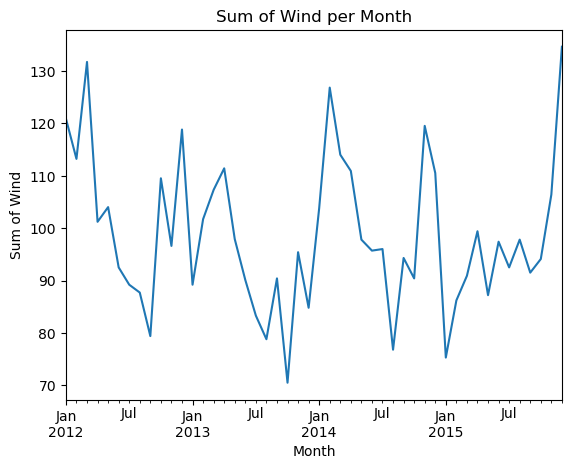

In [88]:
seattle.resample('M').wind.sum().plot()
plt.title('Sum of Wind per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Wind')
plt.show()

### 4. Which year-month combination is the windiest?

In [84]:
seattle.groupby(
    [seattle.index.year, seattle.index.month]
    ).wind.sum().sort_values(ascending=False).head(1)

date  date
2015  12      134.6
Name: wind, dtype: float64

#### December 2015

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [89]:
seattle.head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle


In [94]:
sunny = seattle[seattle.weather == 'sun']

In [99]:
sunny.groupby(sunny.index.year).count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012,118,118,118,118,118
2013,205,205,205,205,205
2014,211,211,211,211,211
2015,180,180,180,180,180


In [103]:
sunny.index.year.value_counts().sort_values().tail(1)

2014    211
Name: date, dtype: int64

#### 2014

### 6. In which month does it rain the most?

In [104]:
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [105]:
rainy = seattle[seattle.weather == 'rain']

In [108]:
sunny.index.month.value_counts().sort_values().tail(1)

8    94
Name: date, dtype: int64

#### August

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [110]:
precip = seattle[seattle.precipitation != 0]

In [113]:
precip.index.month.value_counts().sort_values().tail(1)

12    81
Name: date, dtype: int64

#### December

# Part 3

In [114]:
flights = data.flights_20k()

In [117]:
flights = flights.set_index('date').sort_index()

In [118]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 1. Convert any negative delays to 0.

In [126]:
flights.delay = flights.delay.clip(lower=0)

In [127]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 2. Which hour of the day has the highest average delay?

### 3. Does the day of the week make a difference in the delay amount?

### 4. Does the month make a difference in the delay amount?